In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import os.path 
import math 
import cv2


from modules import voiddetect as vd
from modules import select_voidboundaries as sel
from modules import calcs_all as calcs
#from modules import conversions as convs

#from modules import sym_op as symm
from modules import trace_angle as t_ang

from modules import misorientation

In [2]:
# Column 1-3:   right hand average orientation (phi1, PHI, phi2 in radians)
# Column 4-6:   left hand average orientation (phi1, PHI, phi2 in radians)
# Column 7:     Misorientation Angle
# Column 8-10:  Misorientation Axis in Right Hand grain
# Column 11-13: Misorientation Axis in Left Hand grain
# Column 14:    length (in microns)
# Column 15:    trace angle (in degrees)
# Column 16-19: x,y coordinates of endpoints (in microns)
# Column 20-21: IDs of right hand and left hand grains

inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009', '6_010']

#inputs= ['1_001']

for name in inputs:
    print(name)
    lattice = 'bcc'
    # lattice = raw_input("\n\nCrystal Structure\nIndicate crystal structure.\nType one of the options fcc/bcc/hcp as shown: ")

    ### get current directory
    pa_current = os.getcwd()
    pa_parent = os.path.dirname(pa_current)

    # define paths for convenience
    pa_pic = pa_current + '/pyinputs/' + name + '.jpg'
    pa_txt = pa_current + '/pyinputs/' + name + '.txt'
    pa_selected = pa_current + '/saboutputs/' + name + '/' + 'selected.txt'

    ### Read data from text file
    gbdata = np.genfromtxt(pa_txt)
    selected_data = np.genfromtxt(pa_selected)
    width = np.amax(gbdata[:, 17])
    height = np.amax(gbdata[:, 18])
    
    ### Starting points
    staptsx = gbdata[:, 15]
    staptsy = gbdata[:, 16]
    #### Ending points
    endptsx = gbdata[:, 17]
    endptsy = gbdata[:, 18]
    mis_angle = gbdata[:,6]
    trace=gbdata[:,14]
    #### Euler values
    eul1 = gbdata[:,(0,1,2)]
    eul2 = gbdata[:,(3,4,5)]
    
    

    # Find dimensions for picture
    width = np.amax(gbdata[:, 17])
    height = np.amax(gbdata[:, 18])
    # Column 20-21: IDs of right hand and left hand grains
    lhgrain=gbdata[:, 19]
    rhgrain=gbdata[:, 20]    
        
    # define maximum void area as a multiple of average grain size (last number is factor of multiplication)
    maxarea = width * height / np.amax(gbdata[:, 20]) * 2.5

    ### run voiddetect module and return centers and radii of detected voids
    centers, radii, vheight, voidimage, drawing = vd.findvoid(pa_pic, name, maxarea)

    ### Select boundaries in void vicinity
    selected = sel.selgb(gbdata, centers, radii)
    break

1_001


In [ ]:
import numpy as np

def checkCollision(x1, x2, y1, y2, x, y, radius):
    a = y1 - y2
    b = x2 - x1
    c = x1 * y2 - x2 * y1

    # Finding the distance of line
    # from center.
    dist = ((abs(a * x + b * y + c)) /
            np.sqrt(a * a + b * b))

    #dist= abs( (y2-y1)*x - (x2-x1)*y + x2*y1 + y2*x1 )/np.sqrt( (y2-y1)^2 + (x2-x1)^2)

    # Checking if the distance is less
    # than, greater than or equal to radius.
    if (radius == dist):
        # print("Touch")
        return True
    elif (radius > dist):
        # print("Intersect")
        return True
    else:
        # print("Outside")
        return False
    
    

In [4]:
#copper=[40,65,26]
copper=[90,35,45]
S3=[59,37,63]

copper=np.deg2rad(copper)
S3=np.deg2rad(S3)

g1=misorientation.eul2orient(copper)
g2=misorientation.eul2orient(S3)

g=misorientation.misorientation_matrix(g1,g2)
ang_test_f=misorientation.orient2ang(g)

test_angles, ang_test=misorientation.symm_mis_angle(copper,S3)
print(g1)


[[-5.79227965e-01  7.07106781e-01  4.05579788e-01]
 [-5.79227965e-01 -7.07106781e-01  4.05579788e-01]
 [ 5.73576436e-01 -3.51214273e-17  8.19152044e-01]]


In [60]:
t_i=10
t1=misorientation.eul2orient(eul1[t_i])
t2=misorientation.eul2orient(eul2[t_i])

def symm_mis_angle_ipynb(euler1, euler2):  # Radians
    mis_angles=[] 
    mis_angles_cubic=[]
    g_1 = misorientation.eul2orient(euler1)
    g_2 = misorientation.eul2orient(euler2)
    g=misorientation.misorientation_matrix(g_1,g_2)
    
    for sym_op in misorientation.symmetry_operators('hexagonal'):
        mis_matrix=np.dot(sym_op,g)
        ang, ax = misorientation.orient2ang(mis_matrix)
        mis_angles.append(ang)
    misang=np.amin(mis_angles)
    
    for sym_op_c in misorientation.symmetry_operators('cubic'):
        mis_matrix_c=np.dot(g,sym_op_c)
        ang_c, ax_c = misorientation.orient2ang(mis_matrix_c)
        mis_angles_cubic.append(ang_c)
    misang_cubic=np.amin(mis_angles_cubic)
    
    mis_angles_t=[]
    for sym_op_total in misorientation.symmetry_operators('hexagonal'):
        g1_s=np.dot(sym_op_total,g_1)
        for sym_op_total2 in misorientation.symmetry_operators('hexagonal'):
            g2_s=np.dot(sym_op_total2,g_2)
            g_s=misorientation.misorientation_matrix(g1_s,g2_s)
            ang_t, ax_t = misorientation.orient2ang(g_s)
            mis_angles_t.append(ang_t)
    
    return mis_angles, misang, mis_angles_cubic, misang_cubic, mis_angles_t


test_angles, ang_test, test_angles_c, ang_test_c, mis_angles_t=symm_mis_angle_ipynb(eul1[t_i],eul2[t_i])

print(np.rad2deg(ang_test))
print(np.rad2deg(test_angles))
print(np.rad2deg(np.amin(mis_angles_t)))
print(np.rad2deg(mis_angles_t))
print(np.rad2deg(test_angles))
print(np.rad2deg(ang_test_c))
print(mis_angle[t_i])

60.52229238904178
[ 73.67095716  60.52229239  91.83763312 140.09874362 167.98215076
 116.99615108 136.25543178 122.10095405 124.47066539 142.33271625
 169.2927887  161.44486603]
60.52229238904175
[ 73.67095716 116.99615108 167.98215076 140.09874362  91.83763312
  60.52229239 136.25543178 122.10095405 124.47066539 142.33271625
 169.2927887  161.44486603  60.52229239  73.67095716 116.99615108
 167.98215076 140.09874362  91.83763312 122.10095405 124.47066539
 142.33271625 169.2927887  161.44486603 136.25543178  91.83763312
  60.52229239  73.67095716 116.99615108 167.98215076 140.09874362
 124.47066539 142.33271625 169.2927887  161.44486603 136.25543178
 122.10095405 140.09874362  91.83763312  60.52229239  73.67095716
 116.99615108 167.98215076 142.33271625 169.2927887  161.44486603
 136.25543178 122.10095405 124.47066539 167.98215076 140.09874362
  91.83763312  60.52229239  73.67095716 116.99615108 169.2927887
 161.44486603 136.25543178 122.10095405 124.47066539 142.33271625
 116.99615108

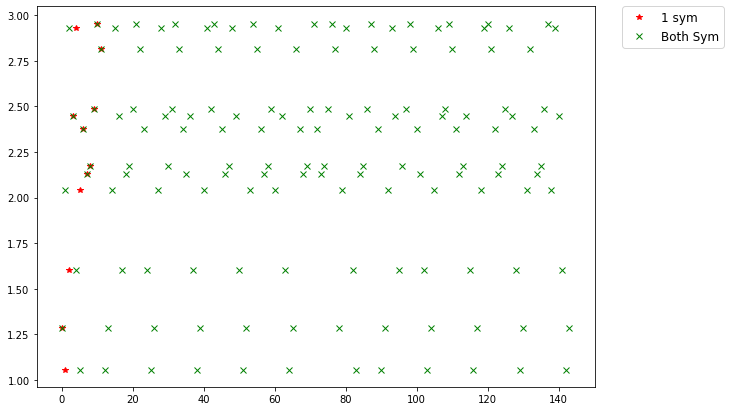

In [61]:
plt.figure(figsize=(10,7))
plt.plot(test_angles,'r*',label='1 sym')
plt.plot(mis_angles_t,'gx',label='Both Sym')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 12}, loc='upper left', borderaxespad=0.)

In [64]:
mis_angle_c=[]
mis_angle_h=[]

for i,euler in enumerate(eul1):
    ang_c=symm_mis_angle_ipynb(eul1[i], eul2[i])[3]
    ang_h=symm_mis_angle_ipynb(eul1[i], eul2[i])[1]
    mis_angle_c.append(ang_c)
    mis_angle_h.append(ang_h)
    #return mis_angles, misang, mis_angles_cubic, misang_cubic, mis_angles_t
    
mis_angle_c=np.rad2deg(mis_angle_c)
mis_angle_h=np.rad2deg(mis_angle_h)

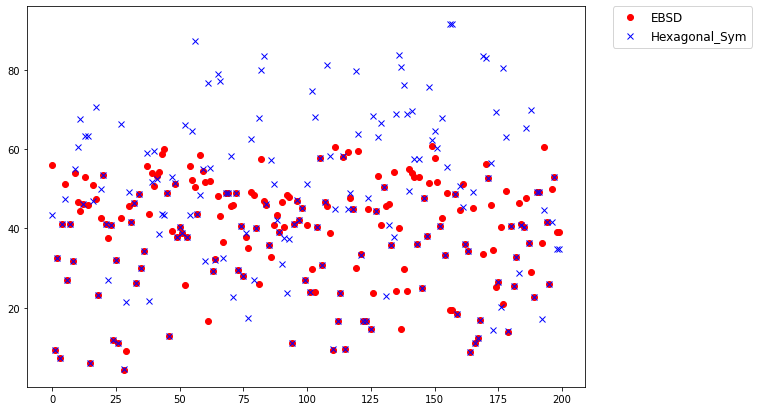

In [72]:
plt.figure(figsize=(10,7))
plt.plot(mis_angle[:200],'ro',label='EBSD')
plt.plot(mis_angle_c[:200],'gx',label='Cubic_Sym')
plt.plot(mis_angle_h[:200],'bx',label='Hexagonal_Sym')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 12}, loc='upper left', borderaxespad=0.)
#plt.savefig('Misor_CvsH.png' , bbox_inches='tight')

In [47]:
t=misorientation.misorientation_matrix(t1,t2)
print(t)
t_angle=np.rad2deg(misorientation.orient2ang(t)[0])
print(t_angle)

[[ 0.84012083 -0.52901713 -0.11974088]
 [ 0.1619201   0.45530501 -0.87548799]
 [ 0.51766676  0.71612724  0.46816973]]
67.55491382528774


In [3]:
misor=[]

for i,euler in enumerate(eul1):
    ang=misorientation.symm_mis_angle(eul1[i],eul2[i])
    misor.append(np.rad2deg(ang))

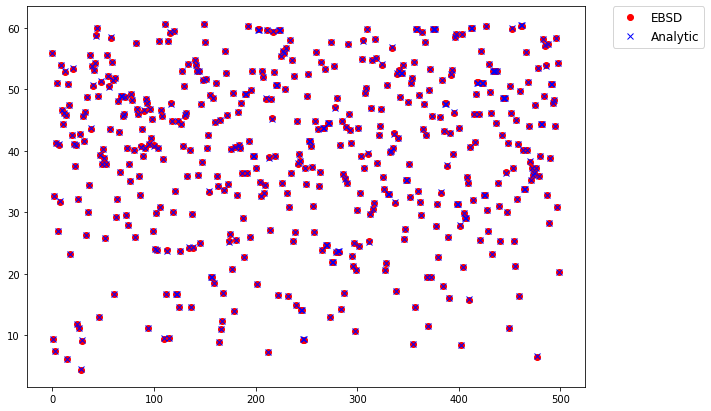

In [8]:
plt.figure(figsize=(10,7))
plt.plot(mis_angle[:500],'ro',label='EBSD')
plt.plot(misor[:500],'bx',label='Analytic')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 12}, loc='upper left', borderaxespad=0.)
plt.savefig('Misorientation.png' , bbox_inches='tight')

In [9]:
# Error Value
error=[]

for i ,angle in enumerate(misor):
    er=(abs(mis_angle[i]-angle)/mis_angle[i])*100
    error.append(er)
print(np.average(error))

0.06330659595663363


In [57]:
### Find trace angle with respect to shock loading. For data I've got from Veronica
### so far, that means the shock loading is in the x-direction TSL Eulerian space. 
### Therefore, 'run' = y-axis and 'rise' = x-axis. Tan(trace)=rise/run

trace_angle=[]
for i,data in enumerate(gbdata):
    nl = [0,0]
    nl[0]=endptsx[i]-staptsx[i]
    nl[1]=endptsy[i]-staptsy[i]
    

    if nl[1]==0:
        inplane = np.pi
    else:
        #inplane = np.arctan(nl[1]/nl[0]) + np.pi/2
        inplane = np.pi - np.arctan(nl[1]/nl[0])
    
    if inplane < 0:
        inplane = np.pi + inplane
    if inplane > np.pi:
        inplane = inplane - np.pi
        
    ### second trace angle since out of plane is from 0 to 90.
    inplane2 = inplane + np.pi
    trace_angle.append(np.degrees(inplane))

<ipython-input-57-1a8bd90146fe>:16: RuntimeWarning: divide by zero encountered in double_scalars
  inplane = np.pi - np.arctan(nl[1]/nl[0])


In [60]:
trace_angle_func=[]

for i,data in enumerate(gbdata):
    trace_angle_func.append(t_ang.trace_angle(staptsx[i],endptsx[i],staptsy[i],endptsy[i]))
    
    

/home/estanislao/Documents/ML_GB/GrainLearning/modules/trace_angle.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  trace = np.pi - np.arctan(nl[1] / nl[0])


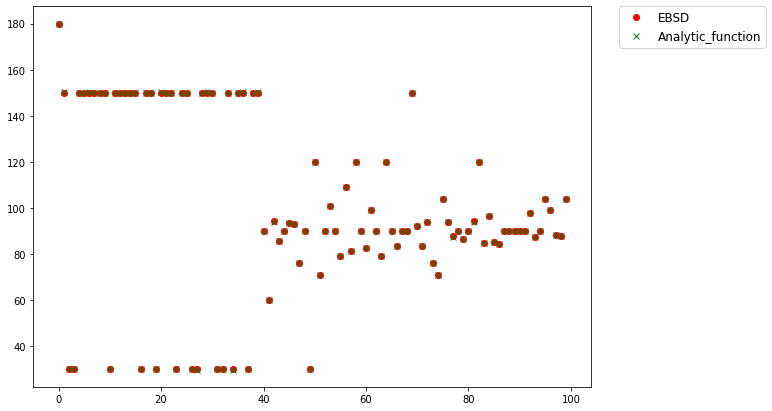

In [61]:
plt.figure(figsize=(10,7))
plt.plot(trace[:100],'ro',label='EBSD')
#plt.plot(trace_angle[:100],'gx',label='Analytic')
plt.plot(trace_angle_func[:100],'gx',label='Analytic_function')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 12}, loc='upper left', borderaxespad=0.)
#plt.savefig('Trace.png' , bbox_inches='tight')

In [62]:
trace_round=np.round(np.array(trace_angle),1)

In [64]:
# Error Value, less than 60 degrees
error_trace=[]

for i ,trace_ang in enumerate(trace):
    if angle<60:
        er=(abs(trace_angle[i]-trace_ang)/trace_ang)*100
        error_trace.append(er)
print(np.average(error_trace))

NameError: name 'angle' is not defined

In [72]:
print(trace_angle[2])
print(trace[2])

59.88626684901748
30.0


In [69]:
nl = [0,0]
nl[0]=endptsx[1]-staptsx[1]
nl[1]=endptsy[1]-staptsy[1]
print(nl)
print(np.degrees(np.pi-np.arctan(nl[1]/nl[0])))

[1.0, 0.5700000000000003]
150.3168598208767


NameError: name 'python' is not defined